<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/skhabiri_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as LA

In [58]:
sales = [3505, 2400,3027,2798,3700,3250,2689]


In [59]:
def my_stat(my_list):
  my_len = len(my_list)
  my_mean=sum(my_list)/my_len
  my_list0sq=[(x-my_mean)**2 for x in my_list]
  my_var = sum(my_list0sq)/(my_len-1)
  my_std = math.sqrt(my_var)
  return my_mean, my_var, my_std



In [60]:
(mean1,var1,std1) = my_stat(sales)
print(type(my_stat(sales)))
print("mean: ", round(mean1,1), "variance: ", round(var1,1), "standard deviation: ", round(std1,1))

<class 'tuple'>
mean:  3052.7 variance:  214387.9 standard deviation:  463.0


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [61]:
customer_num = [127,80,105,92,120,115,93]
zippedlist =  list(zip(sales, customer_num))
df = pd.DataFrame(zippedlist, columns=["sales","customer_num"])
## Alternatively:
# my_dictionary = {"sales":sales, "custome_num":customer_num}
# df = pd.DataFrame(my_dictionary)
cov1 = df.cov()
print(cov1)
df.head()


                      sales  customer_num
sales         214387.904762   7604.357143
customer_num    7604.357143    290.952381


,sales,customer_num
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [62]:
# customer_num_std = df.cov()
cov1.iloc[-1,-1]
## Alternative
# cov1["customer_num"][-1]
customer_num_std = math.sqrt(cov1.iloc[-1,-1])
# print("customer number std: ", customer_num_std)
sales_std = math.sqrt(cov1["sales"][0])
var_list = [[sales_std**2, sales_std*customer_num_std],
            [sales_std*customer_num_std, customer_num_std**2]] 
df_var = pd.DataFrame(var_list)
corr1 = cov1/var_list
corr1
# sum_xy_err
# corr1 = 

,sales,customer_num
sales,1.000000,0.962834
customer_num,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [63]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
!curl https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

"","pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest","has_cabin_number"
"1",1,1,"Allen, Miss. Elisabeth Walton","female",29,0,0,"24160",211.3375,"B5","S","2",NA,"St Louis, MO",1
"2",1,1,"Allison, Master. Hudson Trevor","male",0.9167,1,2,"113781",151.55,"C22 C26","S","11",NA,"Montreal, PQ / Chesterville, ON",1
"3",1,0,"Allison, Miss. Helen Loraine","female",2,1,2,"113781",151.55,"C22 C26","S",NA,NA,"Montreal, PQ / Chesterville, ON",1
"4",1,0,"Allison, Mr. Hudson Joshua Creighton","male",30,1,2,"113781",151.55,"C22 C26","S",NA,135,"Montreal, PQ / Chesterville, ON",1
"5",1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","female",25,1,2,"113781",151.55,"C22 C26","S",NA,NA,"Montreal, PQ / Chesterville, ON",1
"6",1,1,"Anderson, Mr. Harry","male",48,0,0,"19952",26.55,"E12","S","3",NA,"New York, NY",1
"7",1,1,"Andrews, Miss. Kornelia Theodosia","female",63,1,0,"13502",77.9583,"D7","S","10",NA,"Hudson, NY",1
"8",1,0,"Andrews,

In [64]:
cols = list(pd.read_csv(url, nrows =1))
print(cols)
df = pd.read_csv(url, usecols=[i for i in range(1,len(cols))])
print(df.dtypes)
df.head() 

['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'has_cabin_number']
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [65]:
non_number = []
for col in df.columns:
  if df[col].dtypes != ("float64" or "int64"):
    non_number.append(col)
df = df.drop(columns=non_number)
df.head()

,pclass,survived,age,sibsp,parch,fare,body
0,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN
1,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN
2,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN
3,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN


In [66]:
# aggregating vertically (along x axis) and summing entries together
df.isna().sum(axis=0)

pclass         1
survived       1
age            0
sibsp          1
parch          1
fare           2
body        1189
dtype: int64

In [67]:
df = df.drop(columns="body")

In [74]:
df.isna().sum(axis=0)

pclass      1
survived    1
age         0
sibsp       1
parch       1
fare        2
dtype: int64

In [76]:
# Aggregating vertically (along x axis) and drop any row with na
df = df.dropna(axis=0)

In [78]:
df.isna().sum(axis=0)

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [79]:
df.cov()

,pclass,survived,age,sibsp,parch,fare
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738


In [80]:
df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

```The orthogonal vectors are perpendicular to eachother```











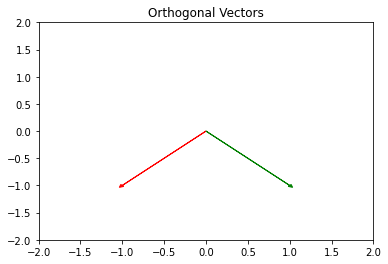

In [82]:
vector_1 = [-1, -1]
vector_2 = [1, -1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

```They are not orthogonal because the dot product of them is not zero```





In [83]:
a=[-5,3,7]
b=[6,-8,2]
np.matmul(a,b)

-40

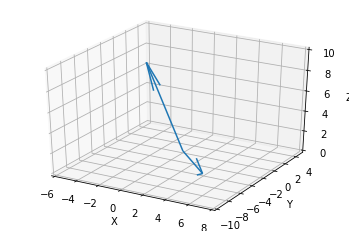

In [97]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver((0,0), (0,0), (0,0), (a[0],b[0]), (a[1],b[1]), (a[2],b[2]), length=1)
ax.set_xlim([-6, 8])
ax.set_ylim([-10, 5])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [111]:
c=np.array([2,-15,6,20])
print("Norm of c is: ", LA.norm(c))
print("dor product of c is: ", np.matmul(c,c))
math.sqrt(np.matmul(c,c))
np.matmul(c.T, c)


Norm of c is:  25.787593916455254
dor product of c is:  665


665

In a Vector C.T . C is the same as dot product

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{j}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [115]:
f = np.array([4,12,11,9,2])
f_hat = f/LA.norm(f)
print(LA.norm(f_hat))
f_hat

0.9999999999999999


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

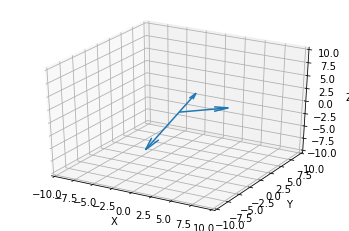

In [128]:
V_dep1 = [1,2,3]
V_dep2 = [-2,-4,-6]

V_ind = [4,4,0]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver3D(0,0,0,1,2,3, length =1)
ax.quiver3D(0,0,0,-2,-4,-6, length =1, cmap='Accent')
ax.quiver3D(0,0,0,4,4,0, length =1, cmap='Oranges')

# ax.quiver((0,0), (0,0), (0,0), (a[0],b[0]), (a[1],b[1]), (a[2],b[2]), length=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

g and h are linearly dependant so the span of them is 1

In [146]:
A = [[1,4],[2,8]]
A2 = [[1,2],[4,8]]
LA.matrix_rank(A)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [141]:
A=np.array([[1,2,3],[-1,0,7],[4,8,2]])
LA.matrix_rank(A)

3

The matrix can have row vector or column vector



# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



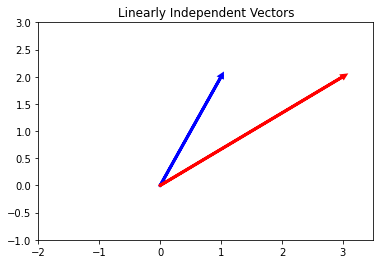

In [152]:
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [1,2] 
b = [3, 2]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

**Independant vectors that can form the span of interest. They don't have to be unit vectors or orthogonal**

---



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [154]:
P = [[1,2,3],
     [-1,0,7],
     [4,8,2]]
LA.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

*Similar to the span of vectors, it determins the number of independant column or row vectors in the matrix.
In other words it identifies the true spacial dimension of the matrix*

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

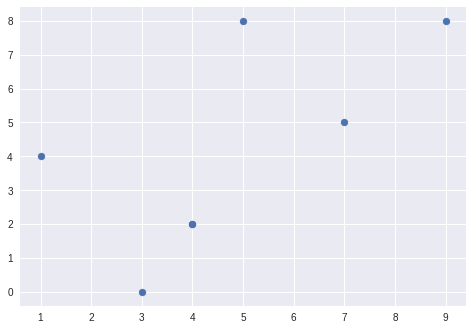

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()